# Symbolic computation of Sine Ridge:

The goal is to create a vector field that has a closed-form expression for the FTLE field, but already displays nontrivial spatial dependence. 

Start with a simple system that has a closed form expression for the flowmap (and also the FTLE field).
$$\dot{x} = -x  \\ \dot{y} = 1 $$
This system can be integrated, and it can be seen that it has an FTLE ridge along the $y$ axis. 

Now introduce a coordinate transform 

$$
(x,y) = w(u, v).
$$

The vector field in the new coordinates can be obtained by differentiating the expression:
$$
\dot{(w(u,v))} = f(w(u,v))
$$

$$
\nabla w \dot{(u,v)} = f(w(u,v)) \\
\dot{(u,v)} = (\nabla w)^{-1} f(w(u,v))
$$

If the flow map of the $(x,y)$ system is $F^\tau (x_0,y_0)$, the transformed system's becomes

$$
(F^\tau(u_0,v_0))' = w^{-1}\circ F^\tau \circ w(u_0,v_0)
$$

For the particular example, we have

$$F^\tau(x_0,y_0) = \left(x_0e^{-\tau}, y_0 + \tau\right)$$.

Let's introduce the transformation 
$$
(x,y) := w(u,v) = (u - \sin v, v) \\
w^{-1}(x,y) = (x + \sin y, y).
$$

Under this, the flow map transforms into

$$
(F^\tau(u_0,v_0))' = \left( \frac{u_0 - \sin v_0}{\sqrt{(u_0 - \sin v_0)^2 + [1-(u_0 -\sin v_0)^2]e^{-2\tau}}} + \sin (v_0 + \tau), v_0 + \tau \right)
$$

From this, we can calculate the flow map gradient, and the Cauchy-Green strain tensor


$\nabla (F^\tau(u_0,v_0))'$ = 
\begin{bmatrix}
    \frac{\partial (F^\tau(u_0,v_0))'_1}{\partial u_0} & \frac{\partial (F^\tau(u_0,v_0))'_1}{\partial v_0} \\
    \frac{\partial (F^\tau(u_0,v_0))'_2}{\partial u_0} & \frac{\partial (F^\tau(u_0,v_0))'_2}{\partial v_0}
\end{bmatrix}

$$
C^\tau(u_0,v_0) = [\nabla (F^\tau(u_0,v_0))']^T\nabla (F^\tau(u_0,v_0))'.
$$

Its maximal eigenvalue gives the FTLE field:
$$
\lambda_2 = \frac{\text{tr}(C) + \sqrt{(\text{tr}(C)^2 - 4\text{det}(C)}}{2} \\
\text{FTLE}(\tau, u_0,v_0) = \frac{\text{log} \lambda_2}{2 \tau}
$$


In [1]:
from sympy import init_printing
init_printing()
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sympy import init_session
init_session()

IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [87]:
u, v, t1, t2 = symbols('u v t1 t2')
def FlowMap1(u, v,t1, t2):
    return (u-sin(v))*exp(-(t2-t1))+ sin(v + (t2-t1))
FlowMapX = FlowMap1(u, v, t1, t2)

def FlowMap2(u,v,t1, t2):
    return v + t2 - t1
FlowMapY = FlowMap2(u, v, t1, t2)

$$ 
F(u_0,v_0,t, t_0)_1 =
$$

In [88]:
FlowMapX

$$ 
F(u_0,v_0,t, t0)_2 =
$$

In [89]:
FlowMapY

In [90]:
fxx = simplify(diff(FlowMapX, u))
fxy = simplify(diff(FlowMapX, v))
fyx = diff(FlowMapY, u)
fyy = diff(FlowMapY, v)

Flowmap Gradient is


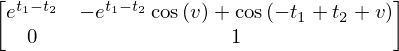

In [91]:
dF = Matrix([[fxx, fxy], [fyx, fyy]])
dF

Cauchy Green tensor

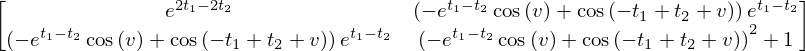

In [92]:
C = dF.T*dF
C

Eigenvalues, calculating it explicitly with the trace-determinant formula

In [93]:
tr = trace(C)
tr = simplify(tr)
determ = det(C)
determ = simplify(determ)

In [94]:
lambdaMax = (tr + sqrt(tr**2 - 4*determ))/2

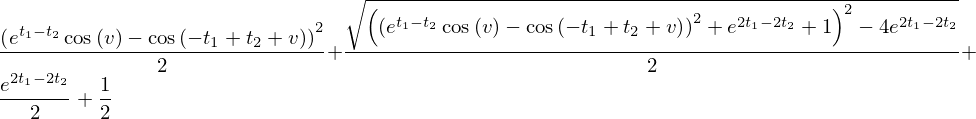

In [95]:
lambdaMax

In [34]:
f = lambdify((u,v,tau,s), lambdaMax, 'numpy')

Creating meshgrid for visuals. Display on a grid of 1000 by 1000.

In [168]:
nx, ny = (100, 100)
u = np.linspace(-2, 2,nx)
v = np.linspace(-4,4,ny)
U, V = np.meshgrid(u,v)

Calculating FTLE values for $t_0=0, t=2$. Saving the result in a matrix for MATLAB processing

In [40]:
time = 2
FTLE = np.log(f(U,V, time, 0))/(2*time)

In [41]:
%matplotlib inline

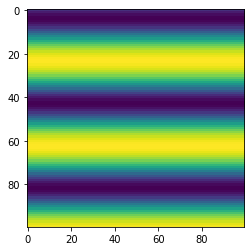

In [42]:
plt.imshow(FTLE)

## Transformation of the vectorfield 

The vector field transforms according to 

$$
\dot{(u,v)} = (\nabla w)^{-1} f(w(u,v)).
$$

Substituting the specific transformation and original vector fields:

$$
\nabla w =$$
\begin{bmatrix}
    1 & -cos v \\
    0 & 1
\end{bmatrix} 
$$(\nabla w)^{-1} =$$ 
\begin{bmatrix}
    1 & cos v \\
    0 & 1
\end{bmatrix} 

$$
\dot{u} = u - \sin v - (u - \sin v)^3 + \cos v \\
\dot{v} = 1
$$

In [155]:
finiteDiff = np.loadtxt('FTLE_finiteDiff.txt')

Displaying the difference between the analytic and the finite difference FTLE fields

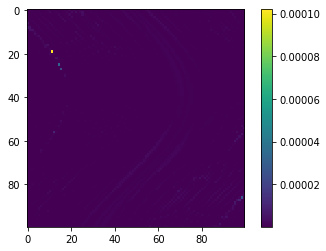

In [156]:
plt.imshow(np.abs(finiteDiff-FTLE))
plt.colorbar()

In [157]:
np.average(np.abs(finiteDiff-FTLE))

# Model Sensitvity

$$
\text{MS}^\tau (u_0,v_0) = \int_0^\tau \sqrt{\lambda_2[u(s),v(s)]} ds
$$

In [97]:
u0 = Symbol('u0')
v0 = Symbol('v0')
s = Symbol('s')
t = Symbol('t')
t0 = Symbol('t0')
us = FlowMapX.subs([(u, u0), (v, v0), (t1, t0), (t2, s)])
vs = FlowMapY.subs([(u, u0), (v, v0), (t1, t0), (t2, s)])

In [98]:
FlowMapX.free_symbols

In [99]:
us

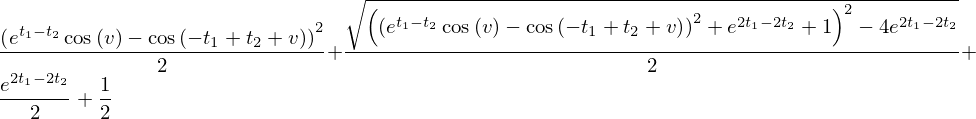

In [100]:
lambdaMax

In [101]:
lambdaAlongTraj = lambdaMax.subs([(u,us), (v,vs), (t1,s), (t2, t)])

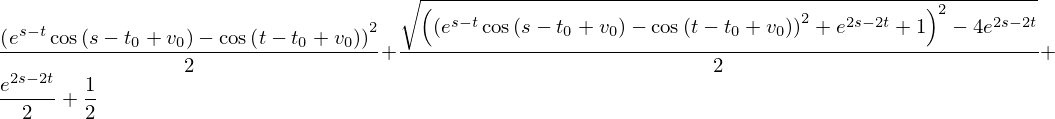

In [102]:
lambdaAlongTraj

In [103]:
lambdaAlongTraj.free_symbols

In [147]:
lambdaAlongTrajNumeric = lambdify((s,t,t0,u0,v0), lambdaAlongTraj, 'numpy')
lambdamaxNumeric = lambdify((t1,t2,u,v), lambdaMax, 'numpy')

In [175]:
integrate_times =np.linspace(0, 2, 200)
values = np.zeros((nx,ny,200))

In [174]:
nx, ny = (100, 100)
unum = np.linspace(-2, 2,nx)
vnum = np.linspace(0,4,ny)
U, V = np.meshgrid(unum,vnum)

The pullback-FTLE is integrated:

$$
\text{MS}^\tau (u_0,v_0) = \int_0^\tau \sqrt{\lambda_2[u(s),v(s)]} ds = \int_0^\tau f(u_0,v_0,s,\tau) ds
$$
Checking that we recover the FTLE field as:
$$
\text{log}(f(u_0,v_0,0,\tau))/\tau = FTLE^\tau(u_0,v_0).
$$

In [142]:
lambdaAlongTrajNumeric(0,2,0,U,V)

array([[1.3084502 , 1.3084502 , 1.3084502 , 1.3084502 , 1.3084502 ,
        1.3084502 , 1.3084502 , 1.3084502 , 1.3084502 , 1.3084502 ],
       [1.79820876, 1.79820876, 1.79820876, 1.79820876, 1.79820876,
        1.79820876, 1.79820876, 1.79820876, 1.79820876, 1.79820876],
       [2.11961781, 2.11961781, 2.11961781, 2.11961781, 2.11961781,
        2.11961781, 2.11961781, 2.11961781, 2.11961781, 2.11961781],
       [2.03652448, 2.03652448, 2.03652448, 2.03652448, 2.03652448,
        2.03652448, 2.03652448, 2.03652448, 2.03652448, 2.03652448],
       [1.60997827, 1.60997827, 1.60997827, 1.60997827, 1.60997827,
        1.60997827, 1.60997827, 1.60997827, 1.60997827, 1.60997827],
       [1.15353829, 1.15353829, 1.15353829, 1.15353829, 1.15353829,
        1.15353829, 1.15353829, 1.15353829, 1.15353829, 1.15353829],
       [1.00567613, 1.00567613, 1.00567613, 1.00567613, 1.00567613,
        1.00567613, 1.00567613, 1.00567613, 1.00567613, 1.00567613],
       [1.27805105, 1.27805105, 1.2780510

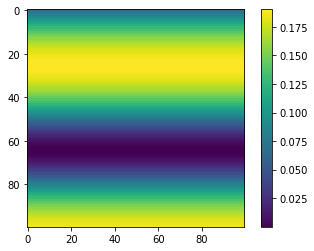

In [181]:
ftle2 = lambdamaxNumeric(0,2,U,V)
ftle2 = np.log(ftle2)/4
plt.imshow(ftle2)
plt.colorbar()

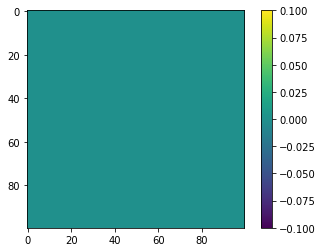

In [188]:
eov = np.loadtxt('FTLE_eovLin_alt.txt')
eov2 = np.loadtxt('FTLE_eovLin.txt')
plt.imshow(np.abs(eov-eov2))
plt.colorbar()

In [122]:
lambdaAlongTrajNumeric

<function _lambdifygenerated(s, t, t0, u0, v0)>

Evaluating the function at fixed time instants

In [176]:
for i in range(200):
    values[:,:,i] = np.sqrt(lambdaAlongTrajNumeric(integrate_times[i],2,0,U,V))

In [171]:
integrate_times[9]

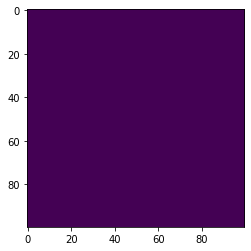

In [138]:
plt.imshow(values[:,:,9]) ##Checking that we recover the FTLE field again

Computing the model sensitivity through numerical integration

In [177]:
MS = np.trapz(values, x = integrate_times, axis = 2)

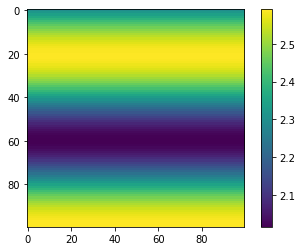

In [178]:
plt.imshow(MS)
plt.colorbar()

Loading numerical results from matlab:

In [179]:
MSEov= np.loadtxt('MS_eovLin.txt')
MSFullEov = np.loadtxt('MSFull_eovLin.txt')



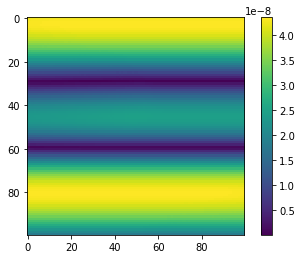

In [186]:
plt.imshow(np.abs(MSEov-MS))
#plt.title("Difference between analytic and Finite Difference Model Sens. fields")
plt.colorbar()